In [1]:
"""
Calculate the WKB approximation for the power law case of the axion relic density.
"""

'\nCalculate the WKB approximation for the power law case of the axion relic density.\n'

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u, constants as c

In [23]:
N = 200

In [24]:
# model paramter
m_a_linear = np.logspace(-24, -12, N) # [eV]
phi_i_linear = 1e9 * np.logspace(13, 18, N) # [eV]
m_a, phi_i = np.meshgrid(m_a_linear, phi_i_linear)

In [25]:
# natural constants
M_pl = 2.435e18 * 1e9 # [eV]

In [26]:
# cosmological parameter
H0 = ((67.74 * u.km / u.second / u.Mpc * c.hbar).to("eV") / u.eV).to_value()
H0

1.4449752577169766e-33

$$
z_\mathrm{eq} = \frac{\rho_c \Omega_m(t_0)}{\rho_\gamma(t_0)} - 1
\Rightarrow 
\Omega_\gamma = \frac{\rho_\gamma}{\rho_c} = \frac{\Omega_m}{z_\mathrm{eq} + 1}
$$

In [27]:
z_eq = 3400
h = 0.65
Omega_DM_h_sq = 0.12
Omega_c = Omega_DM_h_sq / h**2
Omega_b = 0.022 / h**2
Omega_m = Omega_c + Omega_b
Omega_rad = Omega_m / (z_eq + 1)
Omega_rad

9.882230948433194e-05

In [28]:
#Omega_rad = 9.2364e-5 # [1]
#Omega_mat = 0.27 
#Omega_bar = 0.044
#Omega_DM = Omega_mat - Omega_bar
#h = 0.7
#Omega_DM_h_sq = 0.12

In [29]:
# compute the axion relic density parameter
Omega_a = 1/6 * (9*Omega_rad)**(3/4) * (m_a / H0)**(1/2) * (phi_i / M_pl)**2

In [30]:
Omega_a[Omega_a*h**2 > Omega_DM_h_sq] = 0

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


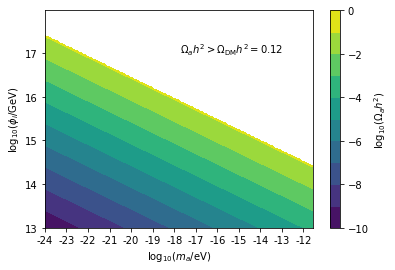

In [40]:
# plot
# plt.figure(figsize=(10,8))
#plt.pcolormesh(np.log10(Omega_a * h**2))
plt.contourf(np.log10(Omega_a * h**2), 10)
plt.xticks(range(0, m_a_linear.size, m_a_linear.size // 12), map(str, range(-24, -12 + 1)))
plt.yticks(range(0, phi_i_linear.size, phi_i_linear.size // 5), map(str, range(13, 18 + 1)))
plt.xlabel(r"$\log_{10}(m_a / \mathrm{eV})$")
plt.ylabel(r"$\log_{10}(\phi_i / \mathrm{GeV})$")
plt.text(2 * N / 4, 4 * N / 5, r"$\Omega_a h^2 > \Omega_\mathrm{DM} h^2 = 0.12$")
cbar = plt.colorbar()
cbar.ax.set_ylabel(r"$\log_{10}(\Omega_a h^2)$")
plt.show()

9.882230948433194e-05